##### Visulization Code to Reference when needed

In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
resp = await fetch(URL)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [2]:
ratings_df = pd.read_csv(ratings_url)

In [3]:
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69], dtype=int64)

In [4]:
ratings_df.prof.nunique()

94

In [6]:
print('Age Mean:', ratings_df['age'].mean())
print('Age Std:',ratings_df['age'].std())

Age Mean: 48.365010799136066
Age Std: 9.80274203786482


In [9]:
no_duplicates_ratings_df = ratings_df.drop_duplicates(subset=['prof'])
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [10]:
print('Age Mean:', no_duplicates_ratings_df['age'].mean())
print('Age Std:',no_duplicates_ratings_df['age'].std())

Age Mean: 47.5531914893617
Age Std: 10.25651329515495


<function matplotlib.pyplot.show(close=None, block=None)>

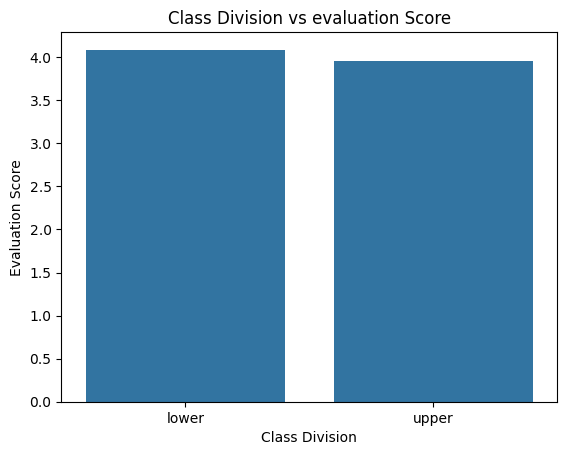

In [15]:
division_eval = ratings_df.groupby('division')['eval'].mean().reset_index()

sns.barplot(x='division', y='eval', data=division_eval)
plt.xlabel('Class Division')
plt.ylabel('Evaluation Score')
plt.title('Class Division vs evaluation Score')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

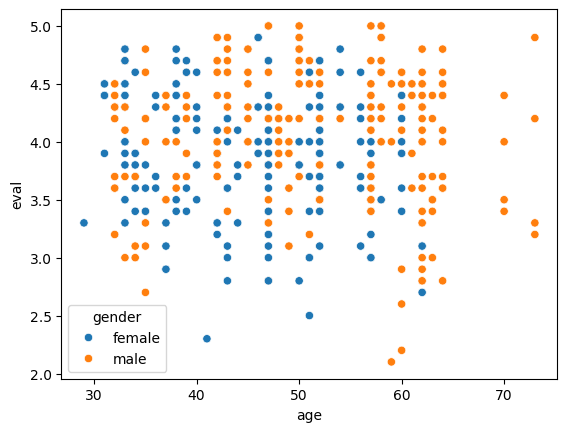

In [17]:
sns.scatterplot(x='age', y='eval', data=ratings_df, hue='gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

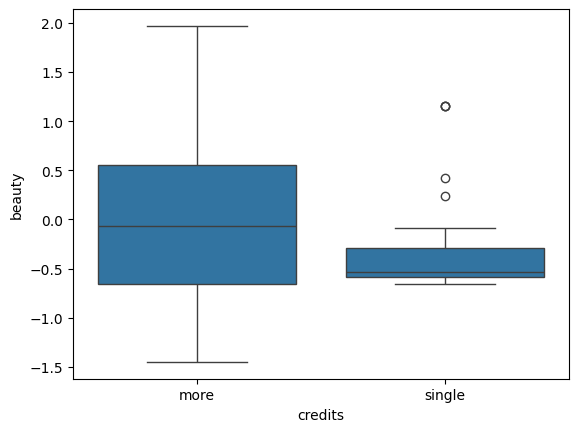

In [18]:
sns.boxplot(x='credits', y='beauty', data=ratings_df)
plt.show

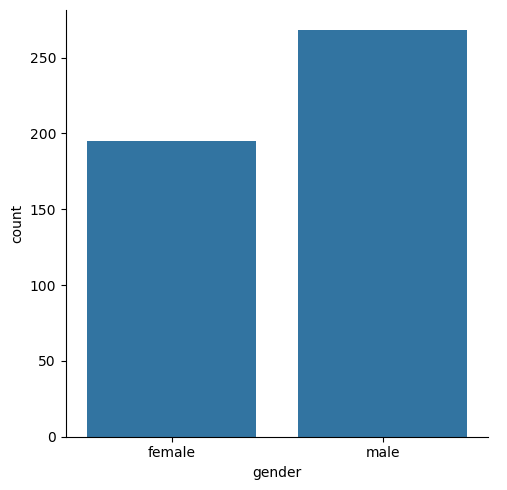

In [19]:
sns.catplot(x='gender', kind='count', data=ratings_df)
plt.show()

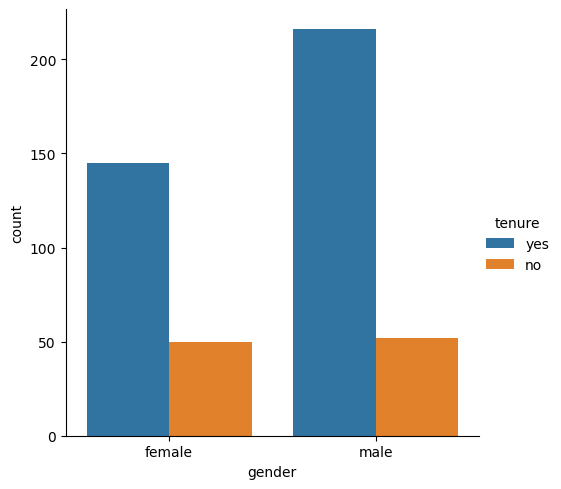

In [24]:
sns.catplot(x='gender', hue='tenure', kind='count', data=ratings_df)
plt.show()

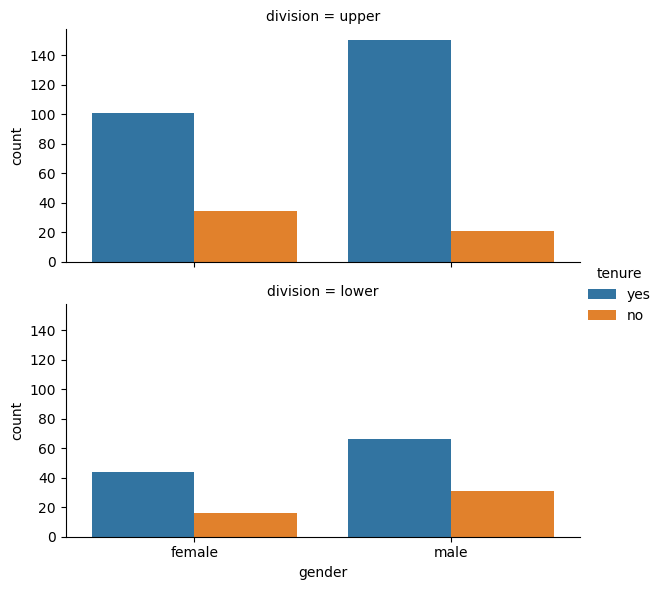

In [26]:
sns.catplot(x='gender', hue='tenure', row='division', kind='count', data=ratings_df,
               height=3, aspect=2)
plt.show()

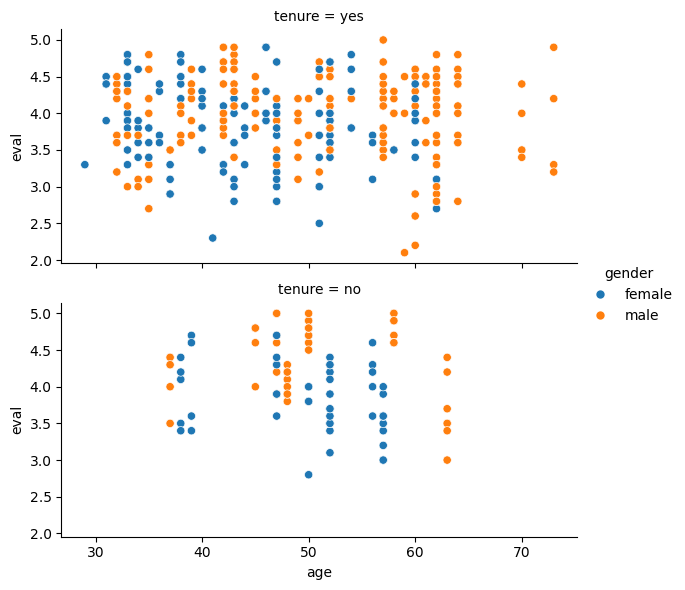

In [27]:
sns.relplot(x='age', y='eval', hue='gender', row='tenure',
           data=ratings_df, height=3, aspect=2)
plt.show()

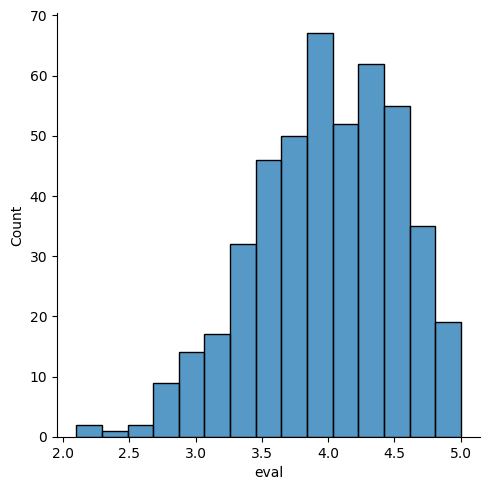

In [29]:
sns.displot(ratings_df['eval'], kde=False)
plt.show()

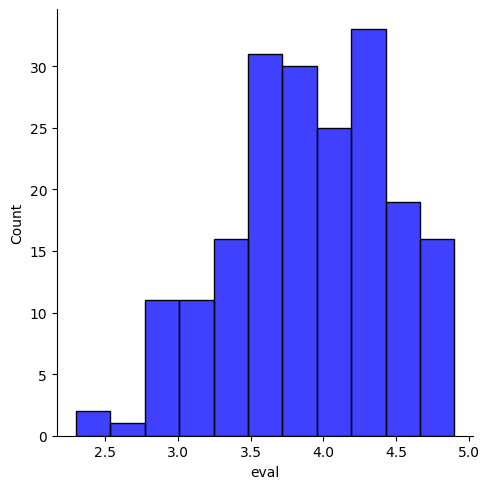

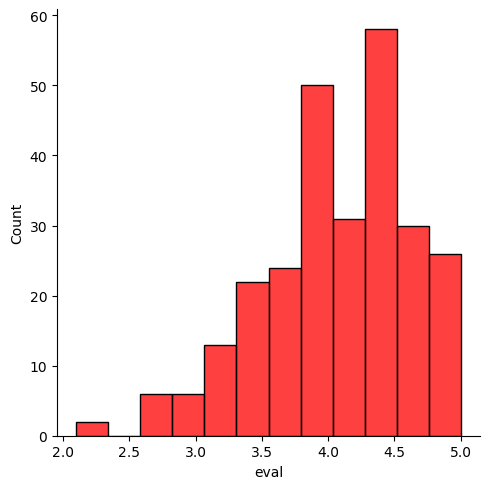

In [31]:
sns.displot(ratings_df[ratings_df['gender']== 'female']['eval'], color='blue', kde=False)
sns.displot(ratings_df[ratings_df['gender']== 'male']['eval'], color='red', kde=False)
plt.show()

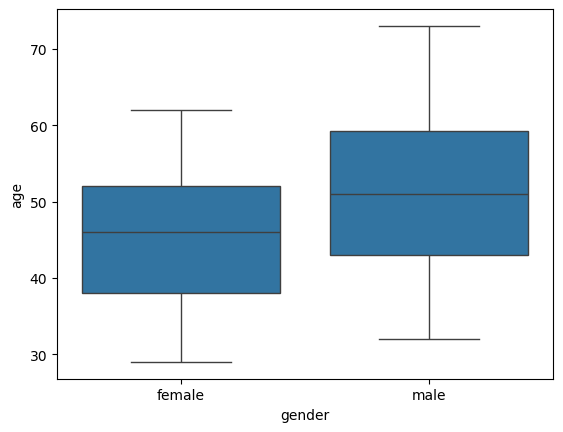

In [33]:
sns.boxplot(x='gender', y='age', data=ratings_df)
plt.show()

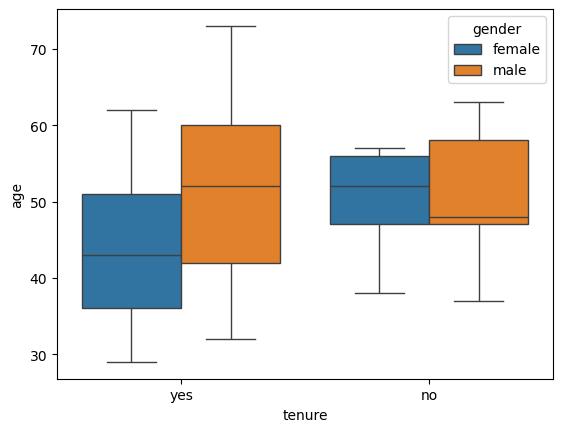

In [37]:
sns.boxplot(x='tenure', y='age', hue='gender',data=ratings_df)
plt.show()

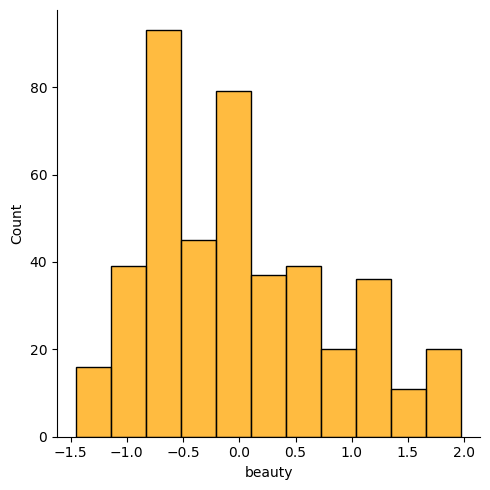

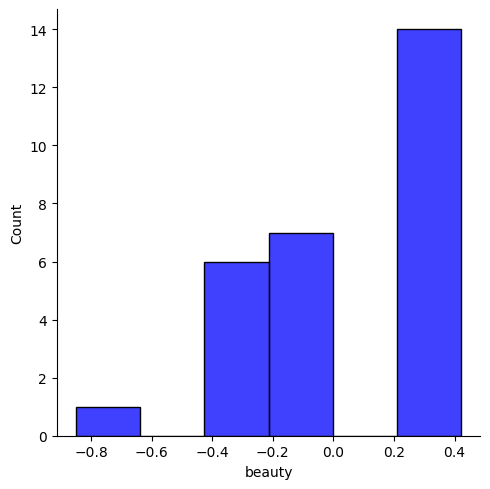

In [39]:
sns.displot(ratings_df[ratings_df['native']== 'yes']['beauty'], color='orange', kde=False)
sns.displot(ratings_df[ratings_df['native']== 'no']['beauty'], color='blue', kde=False)
plt.show()

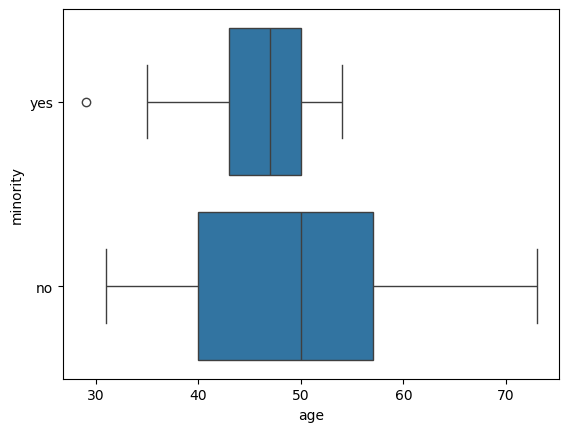

In [41]:
sns.boxplot(x='age', y='minority',data=ratings_df)
plt.show()

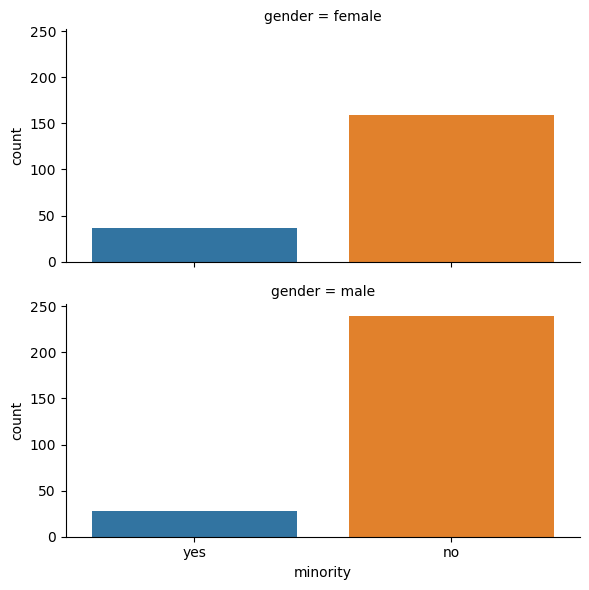

In [43]:
sns.catplot(x='minority', hue='minority', row='gender', kind='count', data=ratings_df,
               height=3, aspect=2)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

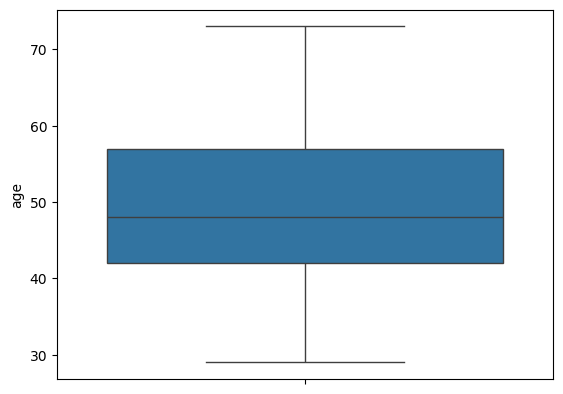

In [45]:
sns.boxplot(y='age', data=ratings_df)
plt.show